In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Ρυθμίσεις matplotlib για ελληνικά και thesis report
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Liberation Serif']
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 16

# IBM Carbon Design System - Categorical Color Palette
# Maximizing contrast between neighboring colors for distinguishable categories
CARBON_COLORS = {
    'purple_70': '#6929c4',   # 01. Purple 70
    'cyan_50': '#1192e8',     # 02. Cyan 50
    'green_60': '#198038',    # 07. Green 60
    'magenta_70': '#9f1853',  # 04. Magenta 70
    'yellow_50': '#b28600',   # 10. Yellow 50
    'red_60': '#da1e28',      # 03. Red 60
}

# Παλέτα χρωμάτων (IBM Carbon Design System)
# Order maximizes visual contrast between adjacent colors
COLORS = [
    CARBON_COLORS['purple_70'],   # Purple
    CARBON_COLORS['cyan_50'],     # Cyan
    CARBON_COLORS['green_60'],    # Green
    CARBON_COLORS['magenta_70'],  # Magenta
    CARBON_COLORS['yellow_50'],   # Yellow
    CARBON_COLORS['red_60'],      # Red
]

print("✓ Βιβλιοθήκες φορτώθηκαν επιτυχώς")

✓ Βιβλιοθήκες φορτώθηκαν επιτυχώς


In [32]:
# Διαδρομή δεδομένων - Αλλάξτε εδώ για διαφορετικό αρχείο
DATA_PATH = "/home/spiros/Desktop/Thesis/results/llm_judge_scores/llm_judge_scores_self_rag_openai_gpt-5.jsonl"

# Δημιουργία φακέλου εξόδου
OUTPUT_DIR = Path("../../results/llm_judge_analysis_self_rag")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Φάκελος εξόδου: {OUTPUT_DIR}")

Φάκελος εξόδου: ../../results/llm_judge_analysis_self_rag


In [33]:
# Φόρτωση δεδομένων από JSONL
data = []
with open(DATA_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

df_raw = pd.DataFrame(data)
print(f"Συνολικός αριθμός εγγραφών: {len(df_raw)}")
print(f"\nΣτήλες: {list(df_raw.columns)}")
print(f"\nΠρώτες εγγραφές (αρχικά scores 1-5):")
print(df_raw[['faithfulness', 'relevance', 'helpfulness']].head())

Συνολικός αριθμός εγγραφών: 500

Στήλες: ['question', 'faithfulness', 'relevance', 'helpfulness', 'justification', 'answer', 'has_context']

Πρώτες εγγραφές (αρχικά scores 1-5):
   faithfulness  relevance  helpfulness
0             2          4            2
1             5          5            5
2             3          5            3
3             2          4            2
4             2          4            2


In [34]:
# Μετατροπή scores από 1-5 σε 0-1 (διαίρεση με το 5)
df = df_raw.copy()
metrics = ['faithfulness', 'relevance', 'helpfulness']

for metric in metrics:
    df[metric] = df[metric] / 5.0

# Υπολογισμός συνολικής βαθμολογίας (μέσος όρος των τριών μετρικών)
df['overall'] = df[metrics].mean(axis=1)

print("✓ Μετατροπή scores σε κλίμακα 0-1 ολοκληρώθηκε")
print(f"\nΜετατρεπμένα scores (0-1):")
print(df[['faithfulness', 'relevance', 'helpfulness', 'overall']].head())

✓ Μετατροπή scores σε κλίμακα 0-1 ολοκληρώθηκε

Μετατρεπμένα scores (0-1):
   faithfulness  relevance  helpfulness   overall
0           0.4        0.8          0.4  0.533333
1           1.0        1.0          1.0  1.000000
2           0.6        1.0          0.6  0.733333
3           0.4        0.8          0.4  0.533333
4           0.4        0.8          0.4  0.533333


In [35]:
# Ονόματα μετρικών στα ελληνικά
metric_names_gr = {
    'faithfulness': 'Πιστότητα',
    'relevance': 'Συνάφεια',
    'helpfulness': 'Χρησιμότητα',
    'overall': 'Συνολική Βαθμολογία'
}

metrics_with_overall = metrics + ['overall']

# Περιγραφικά στατιστικά
print("Περιγραφικά Στατιστικά (Κλίμακα 0-1):")
print("=" * 80)
stats_df = df[metrics_with_overall].describe()
stats_df.columns = [metric_names_gr[col] for col in stats_df.columns]
print(stats_df)

# Αποθήκευση
stats_df.to_csv(OUTPUT_DIR / 'descriptive_statistics.csv', encoding='utf-8-sig')
print(f"\n✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'descriptive_statistics.csv'}")

Περιγραφικά Στατιστικά (Κλίμακα 0-1):
        Πιστότητα    Συνάφεια  Χρησιμότητα  Συνολική Βαθμολογία
count  500.000000  500.000000   500.000000           500.000000
mean     0.694000    0.857200     0.669600             0.740267
std      0.206614    0.193295     0.198884             0.180318
min      0.200000    0.200000     0.200000             0.200000
25%      0.600000    0.800000     0.600000             0.666667
50%      0.800000    1.000000     0.800000             0.800000
75%      0.800000    1.000000     0.800000             0.866667
max      1.000000    1.000000     1.000000             1.000000

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/descriptive_statistics.csv


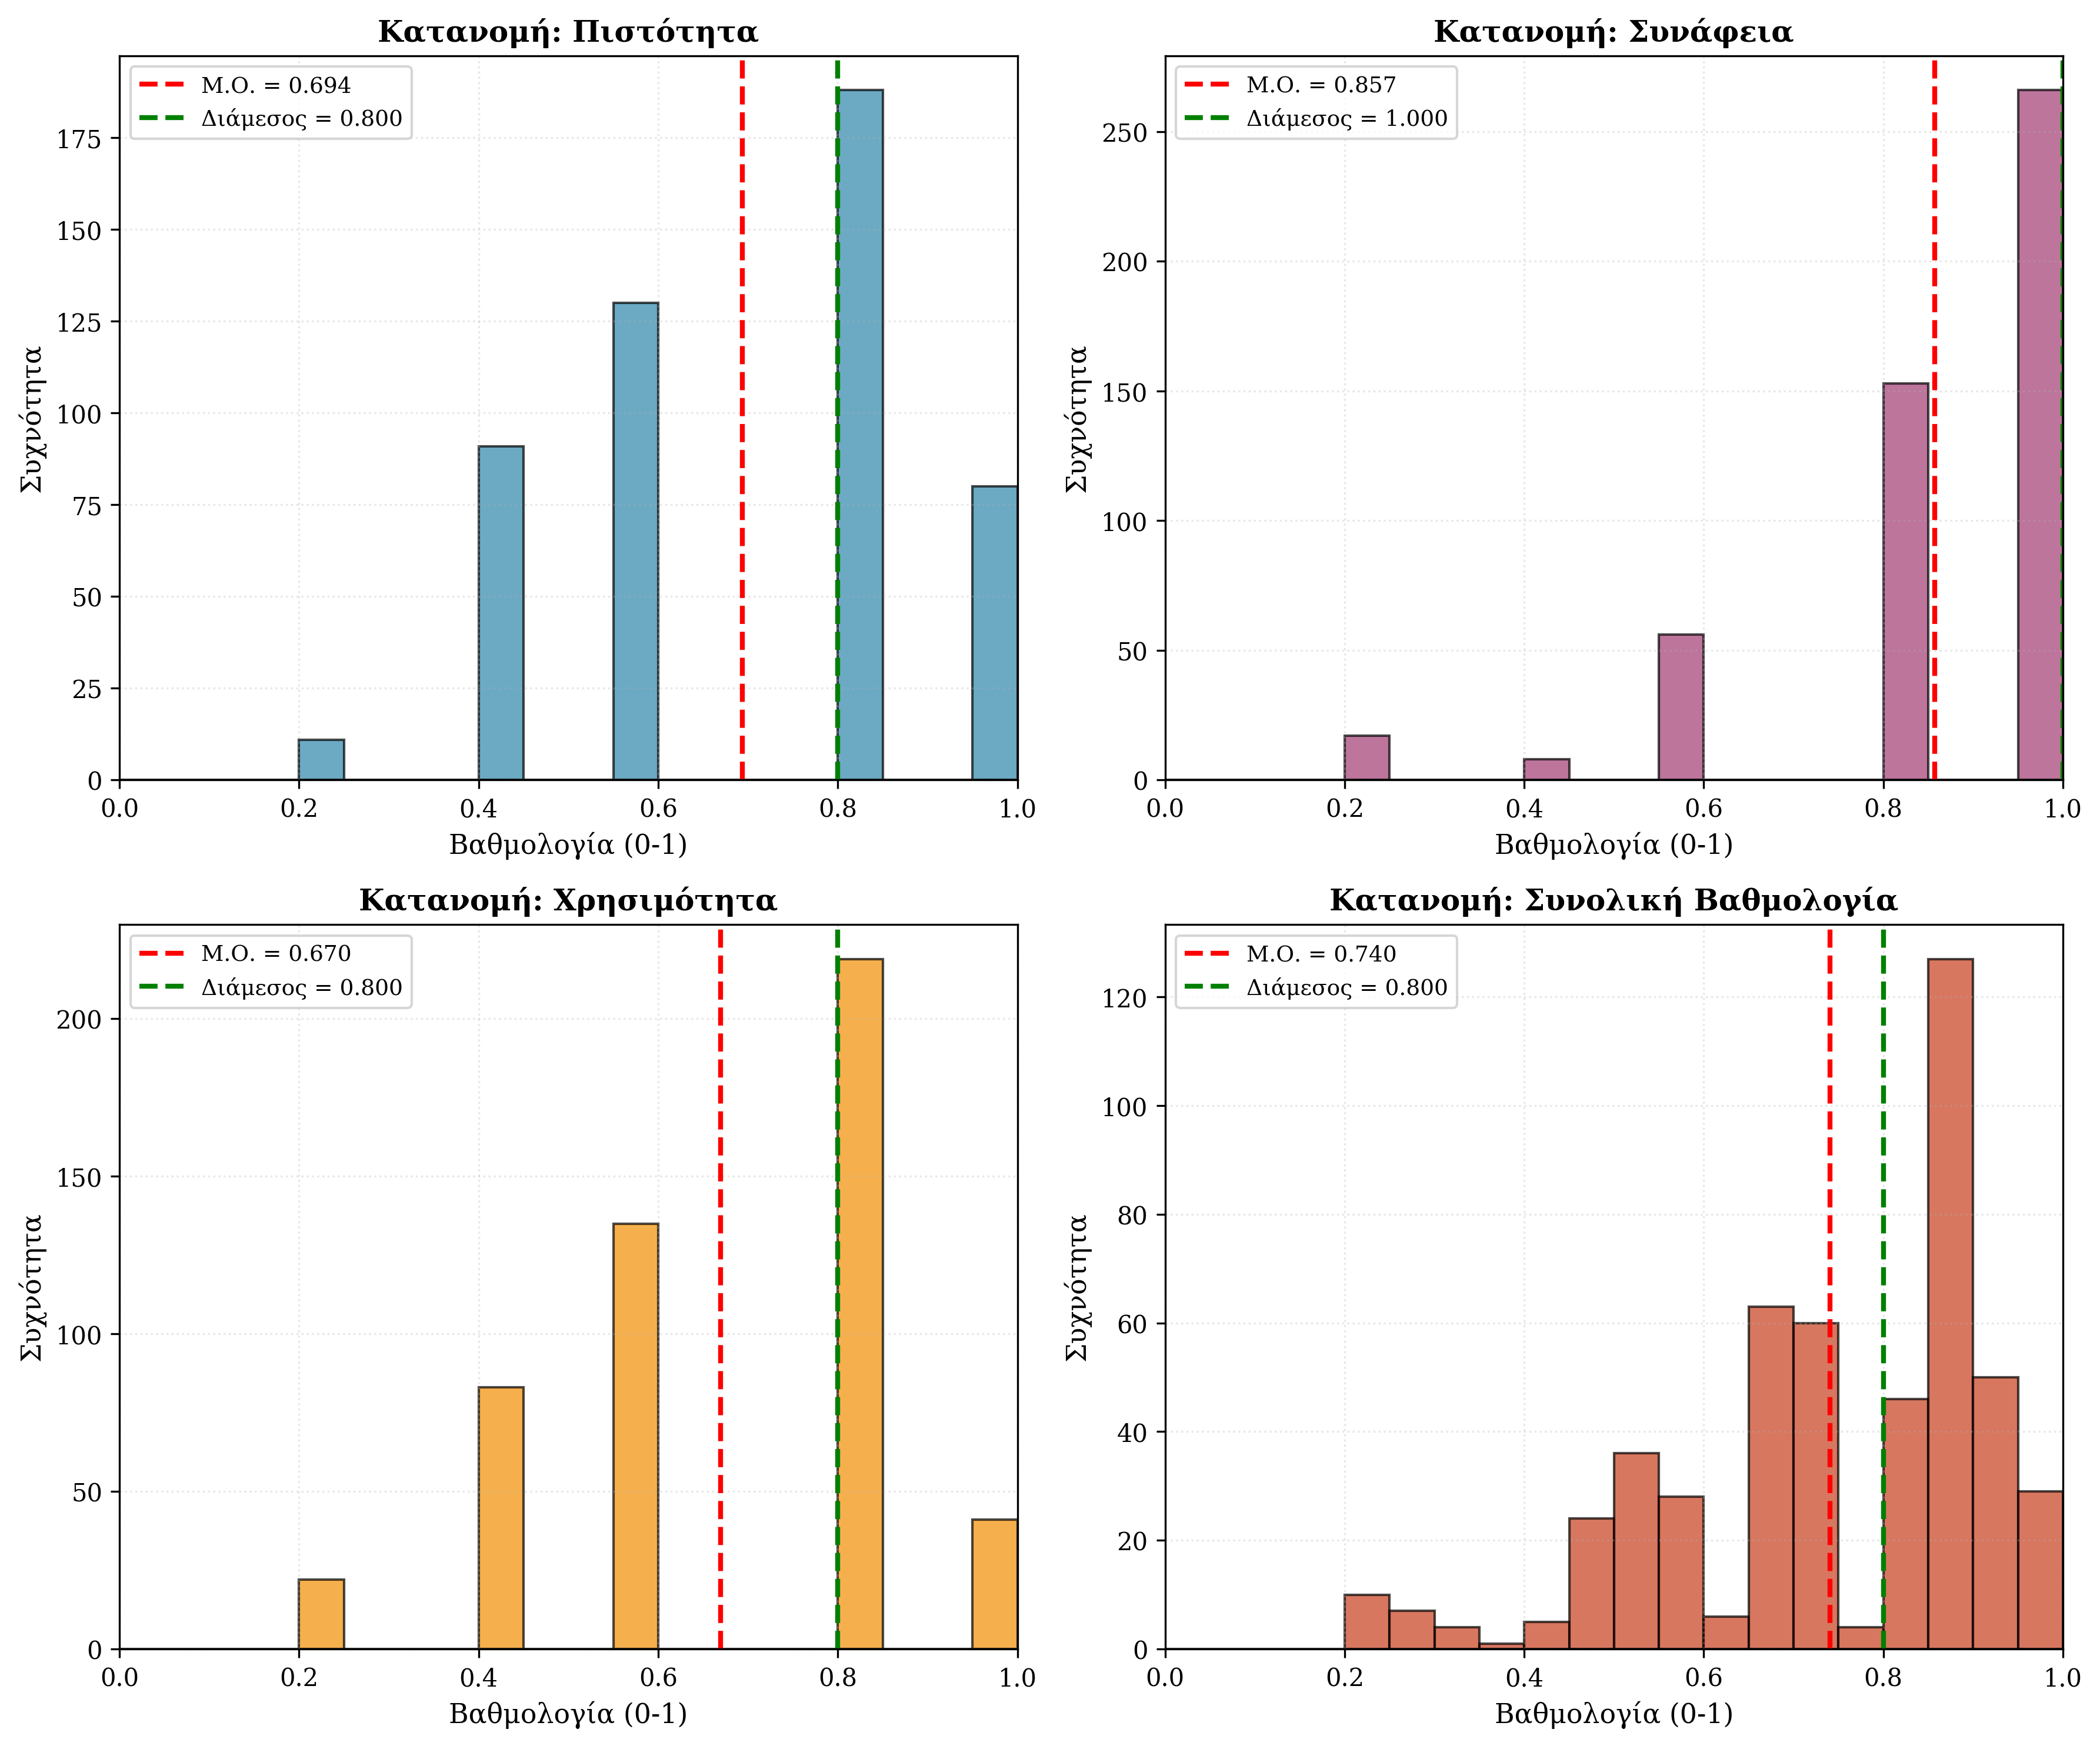

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/score_distributions.png


In [36]:
# Ιστογράμματα για κάθε μετρική
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

all_metrics = ['faithfulness', 'relevance', 'helpfulness', 'overall']

for idx, metric in enumerate(all_metrics):
    ax = axes[idx]
    ax.hist(df[metric], bins=20, color=COLORS[idx % len(COLORS)], 
            edgecolor='black', alpha=0.7, range=(0, 1))
    ax.set_xlabel('Βαθμολογία (0-1)', fontsize=11)
    ax.set_ylabel('Συχνότητα', fontsize=11)
    ax.set_title(f'Κατανομή: {metric_names_gr[metric]}', fontsize=12, fontweight='bold')
    ax.axvline(df[metric].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Μ.Ο. = {df[metric].mean():.3f}')
    ax.axvline(df[metric].median(), color='green', linestyle='--', 
               linewidth=2, label=f'Διάμεσος = {df[metric].median():.3f}')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3, linestyle=':')
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'score_distributions.png'}")

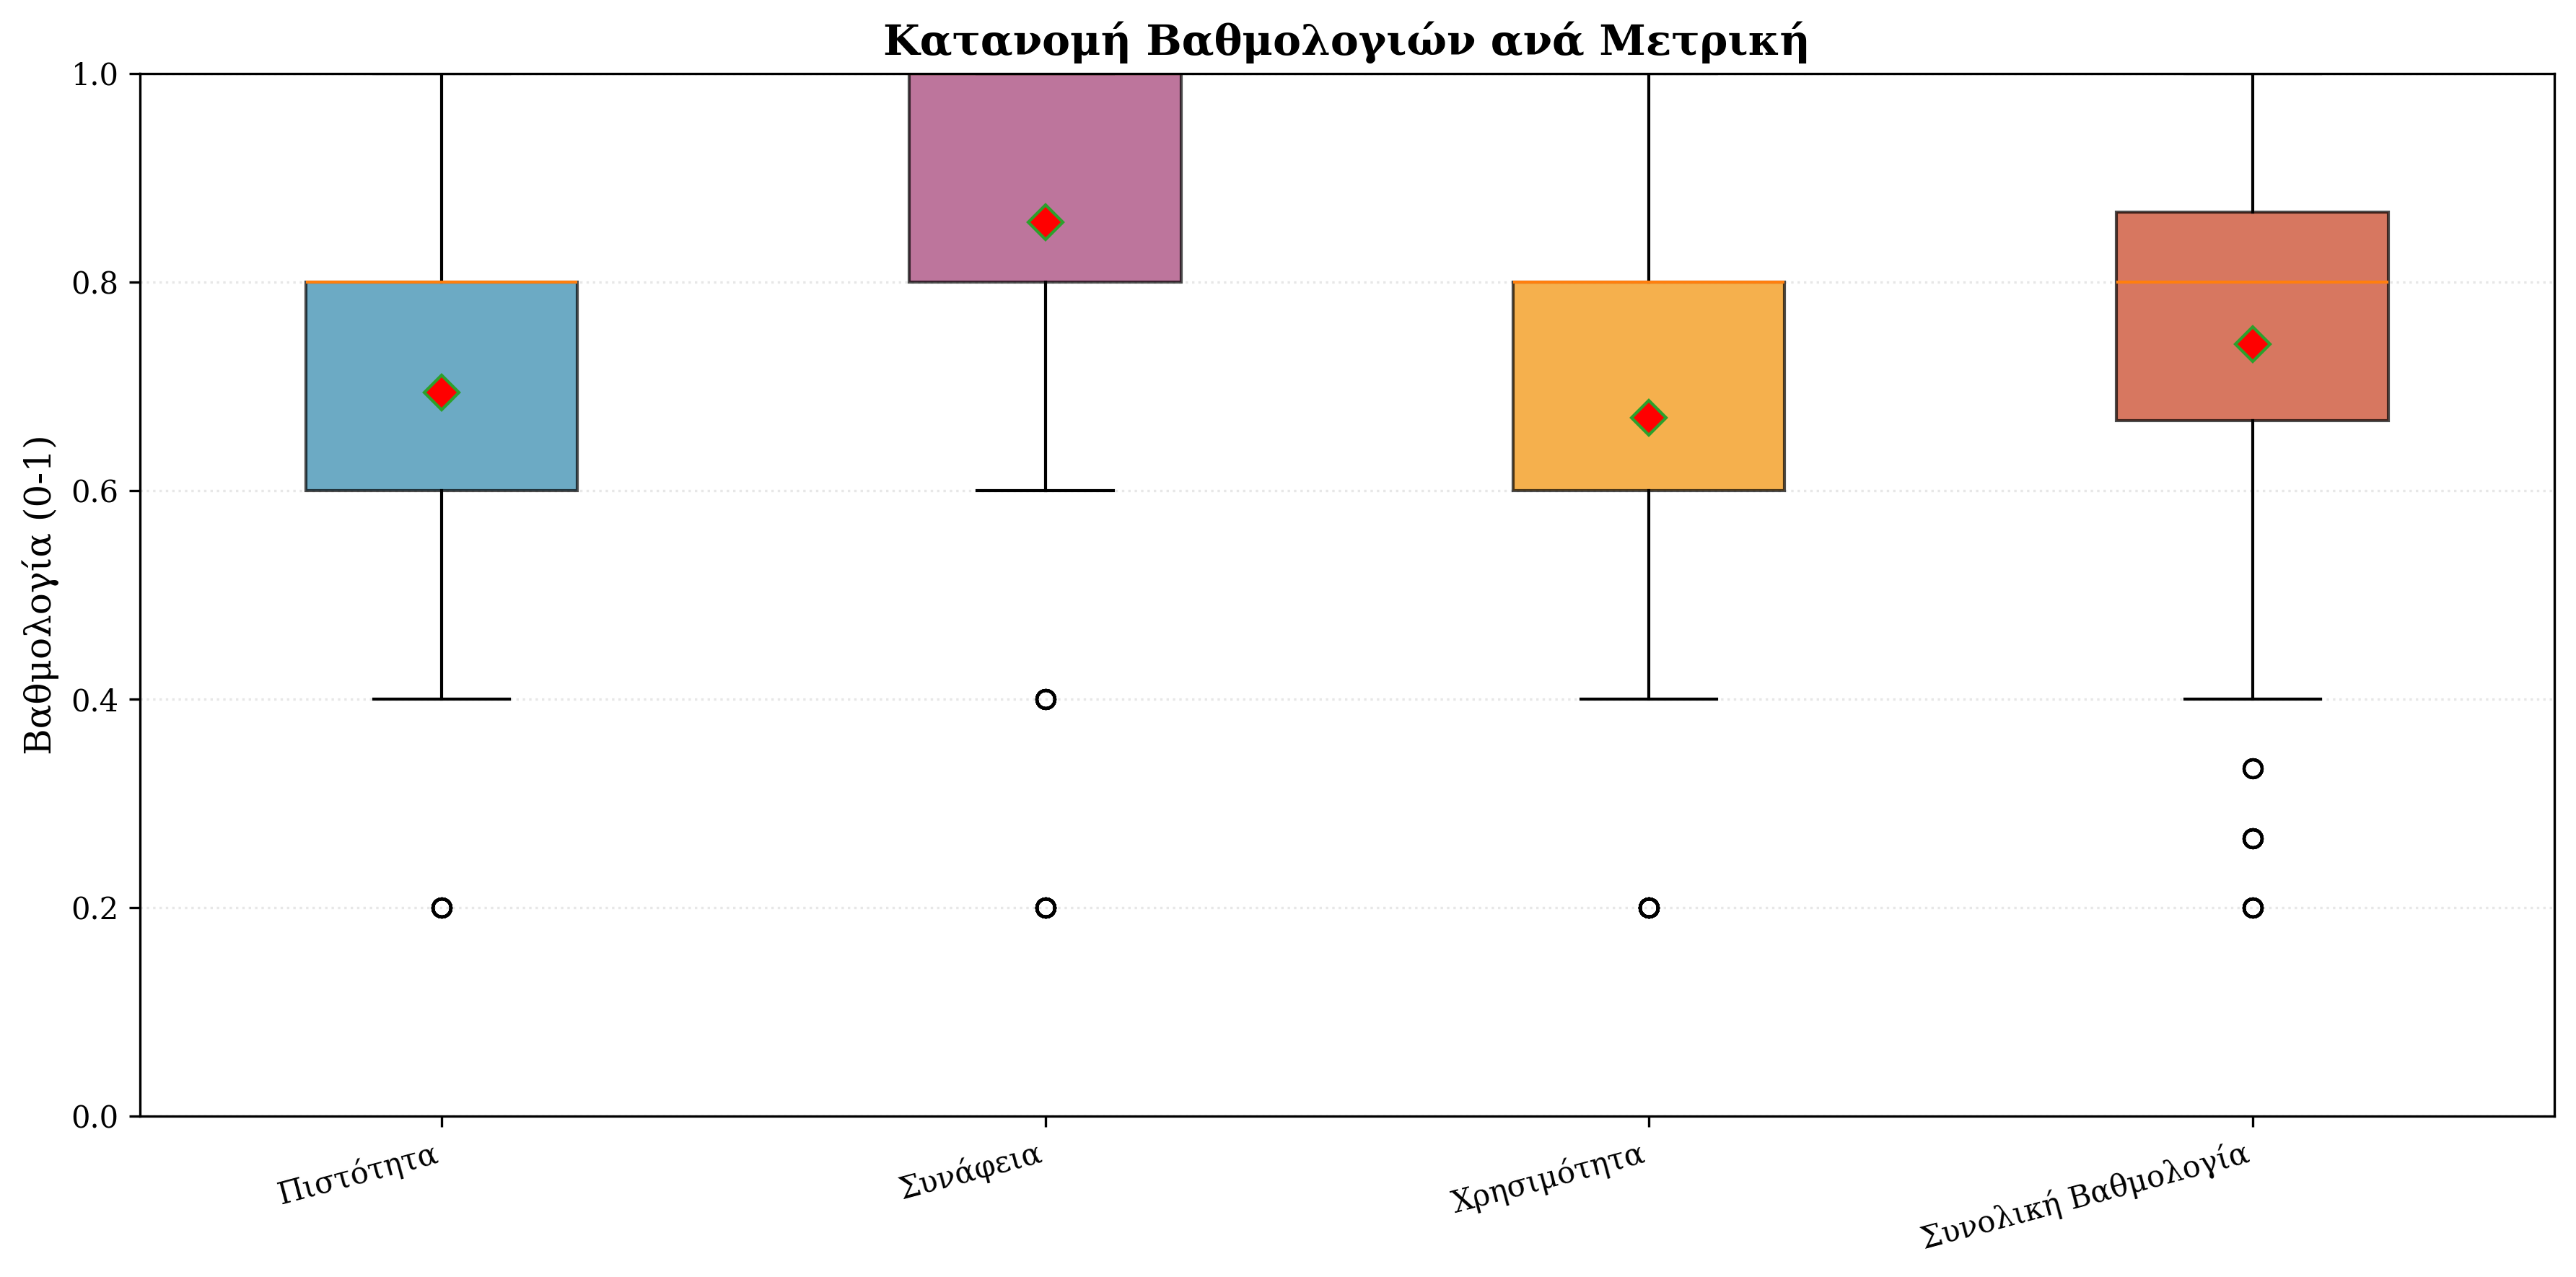

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/boxplot_metrics.png


In [37]:
# Δημιουργία boxplot για όλες τις μετρικές
fig, ax = plt.subplots(figsize=(12, 6))

all_metrics = ['faithfulness', 'relevance', 'helpfulness', 'overall']
df_plot = df[all_metrics].copy()
df_plot.columns = [metric_names_gr[col] for col in df_plot.columns]

bp = ax.boxplot([df_plot[col] for col in df_plot.columns], 
                 labels=df_plot.columns,
                 patch_artist=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Χρωματισμός
for patch, color in zip(bp['boxes'], COLORS):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Βαθμολογία (0-1)', fontsize=12)
ax.set_title('Κατανομή Βαθμολογιών ανά Μετρική', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle=':')
ax.set_ylim(0, 1)
plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'boxplot_metrics.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'boxplot_metrics.png'}")

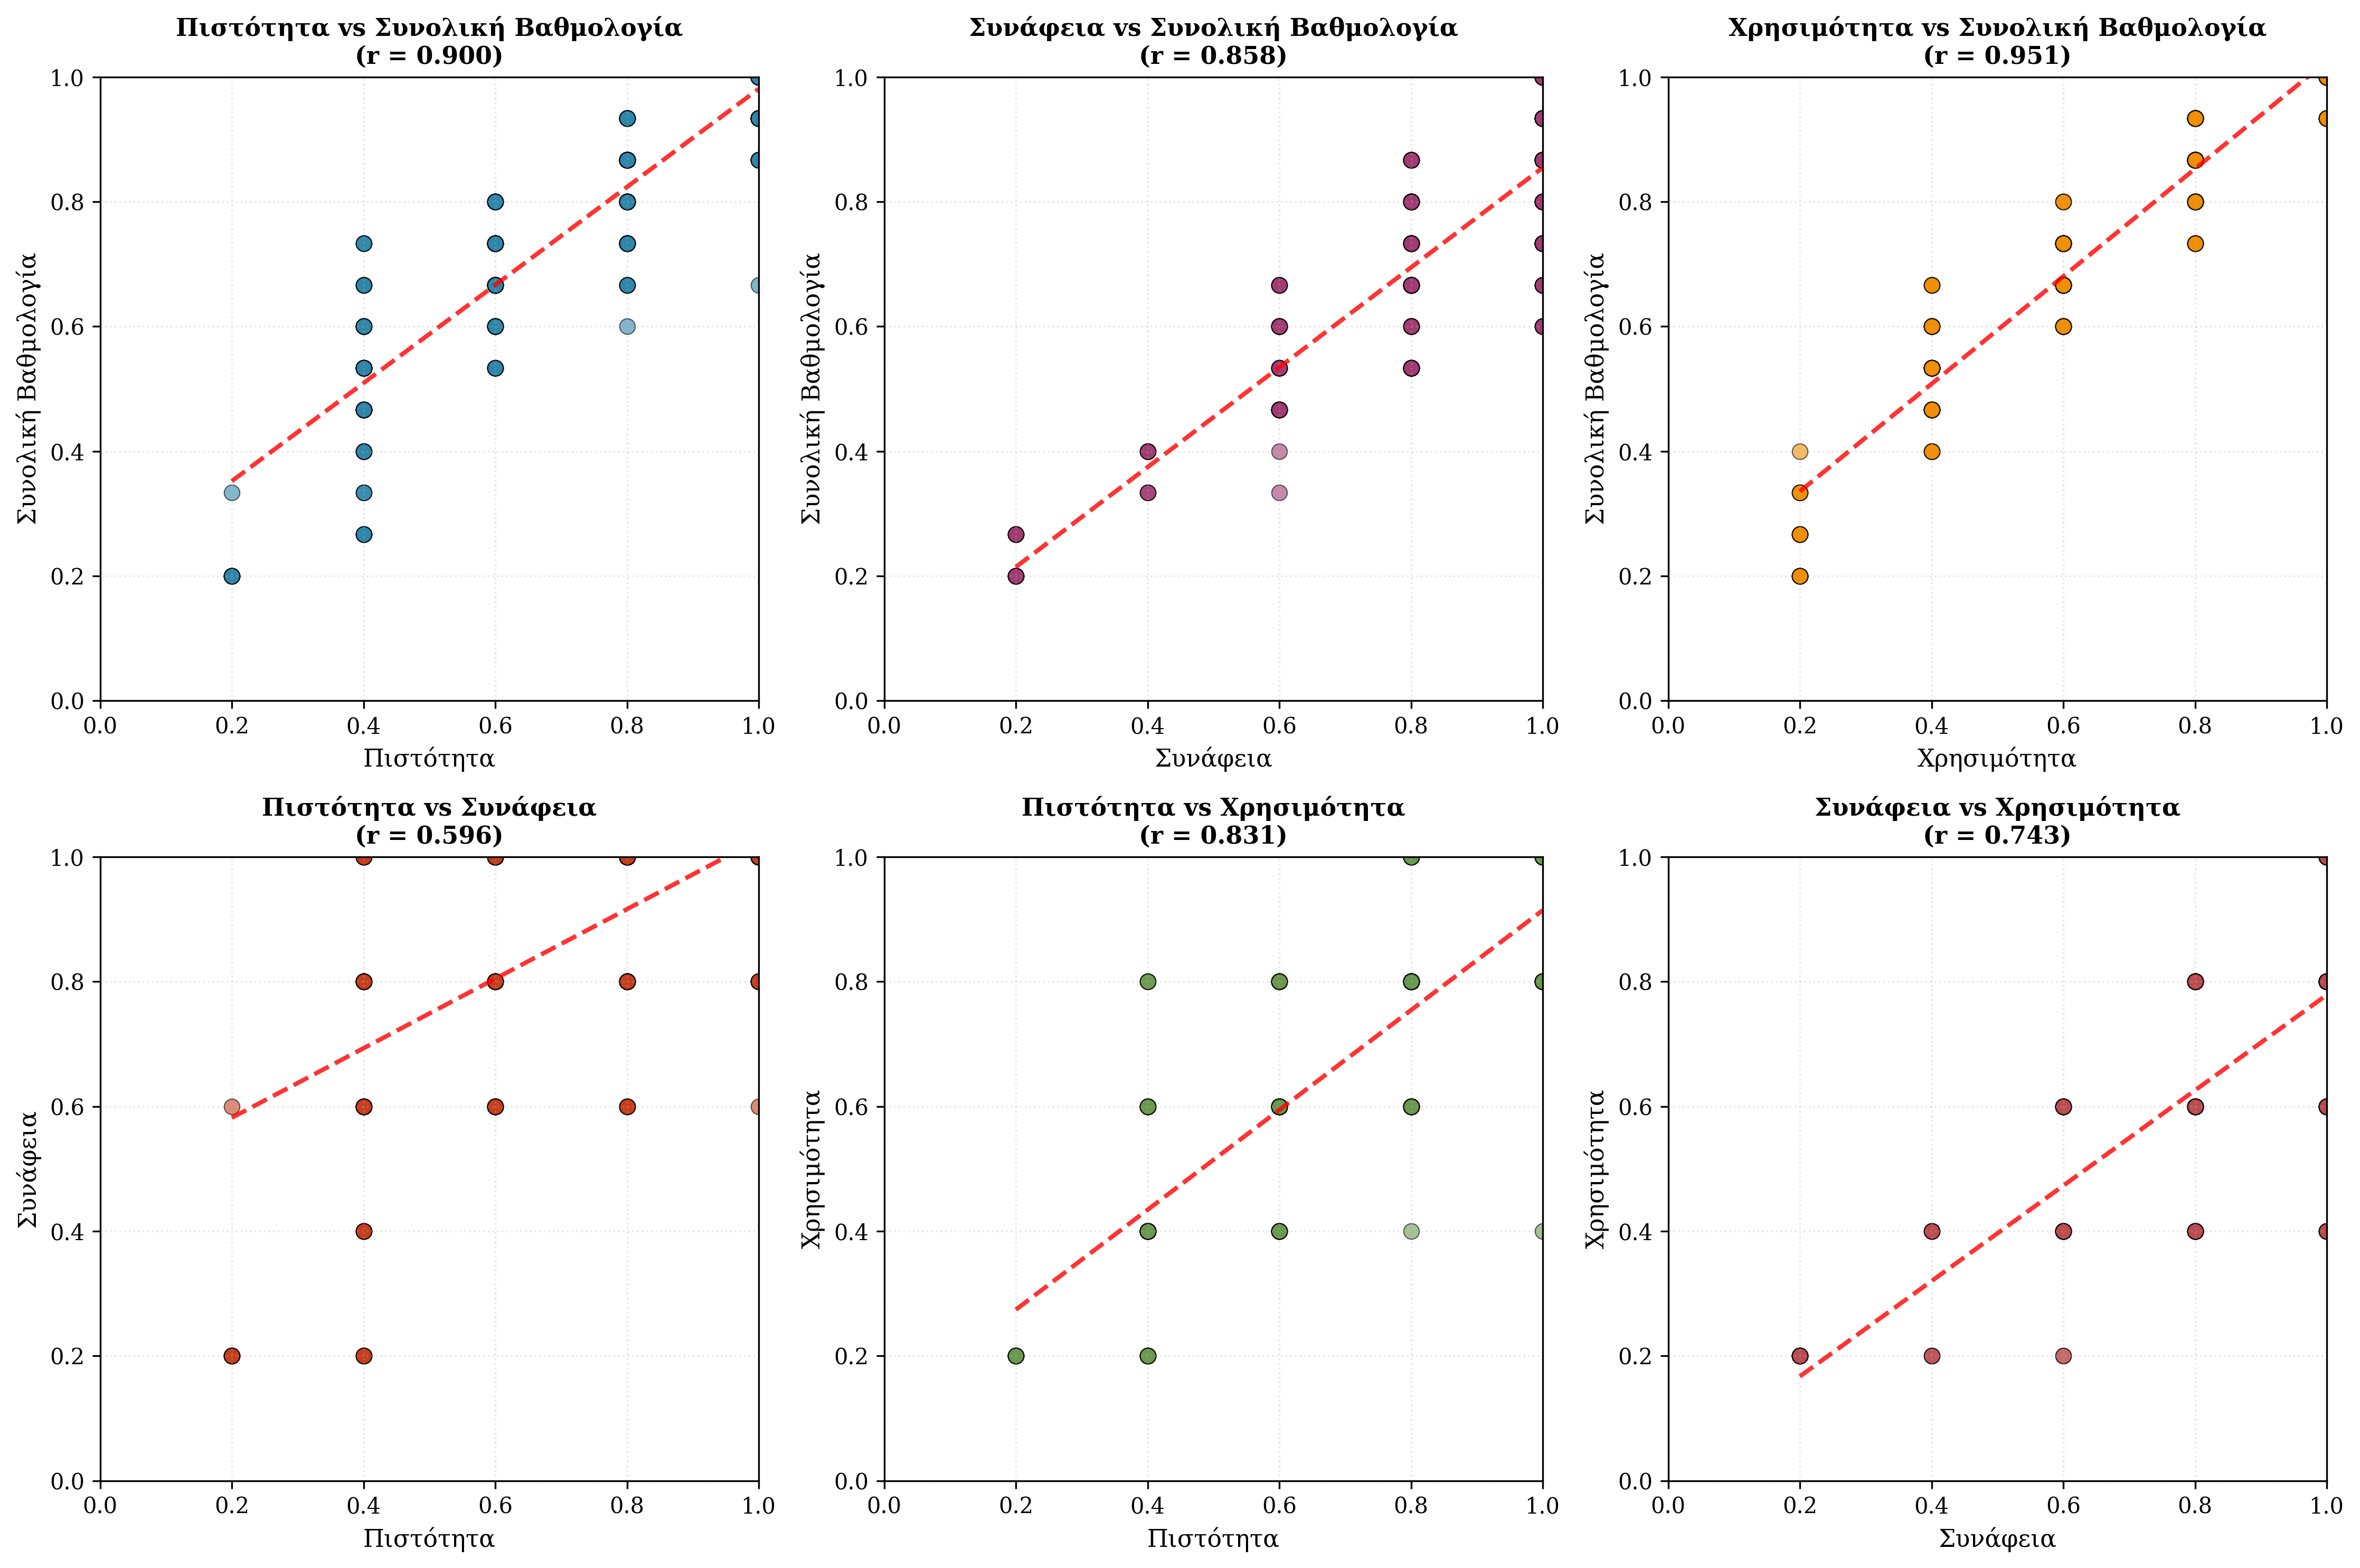

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/scatter_plots.png


In [38]:
# Scatter plots για τις πιο ενδιαφέρουσες σχέσεις
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

pairs = [
    ('faithfulness', 'overall'),
    ('relevance', 'overall'),
    ('helpfulness', 'overall'),
    ('faithfulness', 'relevance'),
    ('faithfulness', 'helpfulness'),
    ('relevance', 'helpfulness')
]

for idx, (x_metric, y_metric) in enumerate(pairs):
    ax = axes[idx]
    ax.scatter(df[x_metric], df[y_metric], alpha=0.6, 
               color=COLORS[idx % len(COLORS)], s=50, edgecolors='black', linewidth=0.5)
    
    # Γραμμή τάσης
    z = np.polyfit(df[x_metric], df[y_metric], 1)
    p = np.poly1d(z)
    ax.plot(df[x_metric].sort_values(), p(df[x_metric].sort_values()), 
            "r--", alpha=0.8, linewidth=2)
    
    # Συντελεστής συσχέτισης
    r = df[x_metric].corr(df[y_metric])
    
    ax.set_xlabel(metric_names_gr[x_metric], fontsize=11)
    ax.set_ylabel(metric_names_gr[y_metric], fontsize=11)
    ax.set_title(f'{metric_names_gr[x_metric]} vs {metric_names_gr[y_metric]}\n(r = {r:.3f})', 
                 fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3, linestyle=':')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'scatter_plots.png'}")

In [39]:
# Κατηγοριοποίηση βαθμολογιών (0-1 κλίμακα)
def categorize_score(score):
    if score >= 0.8:
        return 'Άριστη (≥0.8)'
    elif score >= 0.6:
        return 'Καλή (0.6-0.79)'
    elif score >= 0.4:
        return 'Μέτρια (0.4-0.59)'
    elif score >= 0.2:
        return 'Χαμηλή (0.2-0.39)'
    else:
        return 'Πολύ Χαμηλή (<0.2)'

# Εφαρμογή κατηγοριοποίησης
all_metrics = ['faithfulness', 'relevance', 'helpfulness', 'overall']
for metric in all_metrics:
    df[f'{metric}_category'] = df[metric].apply(categorize_score)

# Πίνακας κατανομής
print("Κατανομή Απαντήσεων ανά Κατηγορία Βαθμολογίας:")
print("=" * 80)

category_counts = {}
for metric in all_metrics:
    counts = df[f'{metric}_category'].value_counts()
    category_counts[metric_names_gr[metric]] = counts

category_df = pd.DataFrame(category_counts).fillna(0).astype(int)
category_order = ['Άριστη (≥0.8)', 'Καλή (0.6-0.79)', 'Μέτρια (0.4-0.59)', 
                  'Χαμηλή (0.2-0.39)', 'Πολύ Χαμηλή (<0.2)']
category_df = category_df.reindex(category_order, fill_value=0)

print(category_df)
category_df.to_csv(OUTPUT_DIR / 'category_distribution.csv', encoding='utf-8-sig')
print(f"\n✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'category_distribution.csv'}")

Κατανομή Απαντήσεων ανά Κατηγορία Βαθμολογίας:
                    Πιστότητα  Συνάφεια  Χρησιμότητα  Συνολική Βαθμολογία
Άριστη (≥0.8)             268       419          260                  252
Καλή (0.6-0.79)           130        56          135                  161
Μέτρια (0.4-0.59)          91         8           83                   65
Χαμηλή (0.2-0.39)          11        17           22                   22
Πολύ Χαμηλή (<0.2)          0         0            0                    0

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/category_distribution.csv


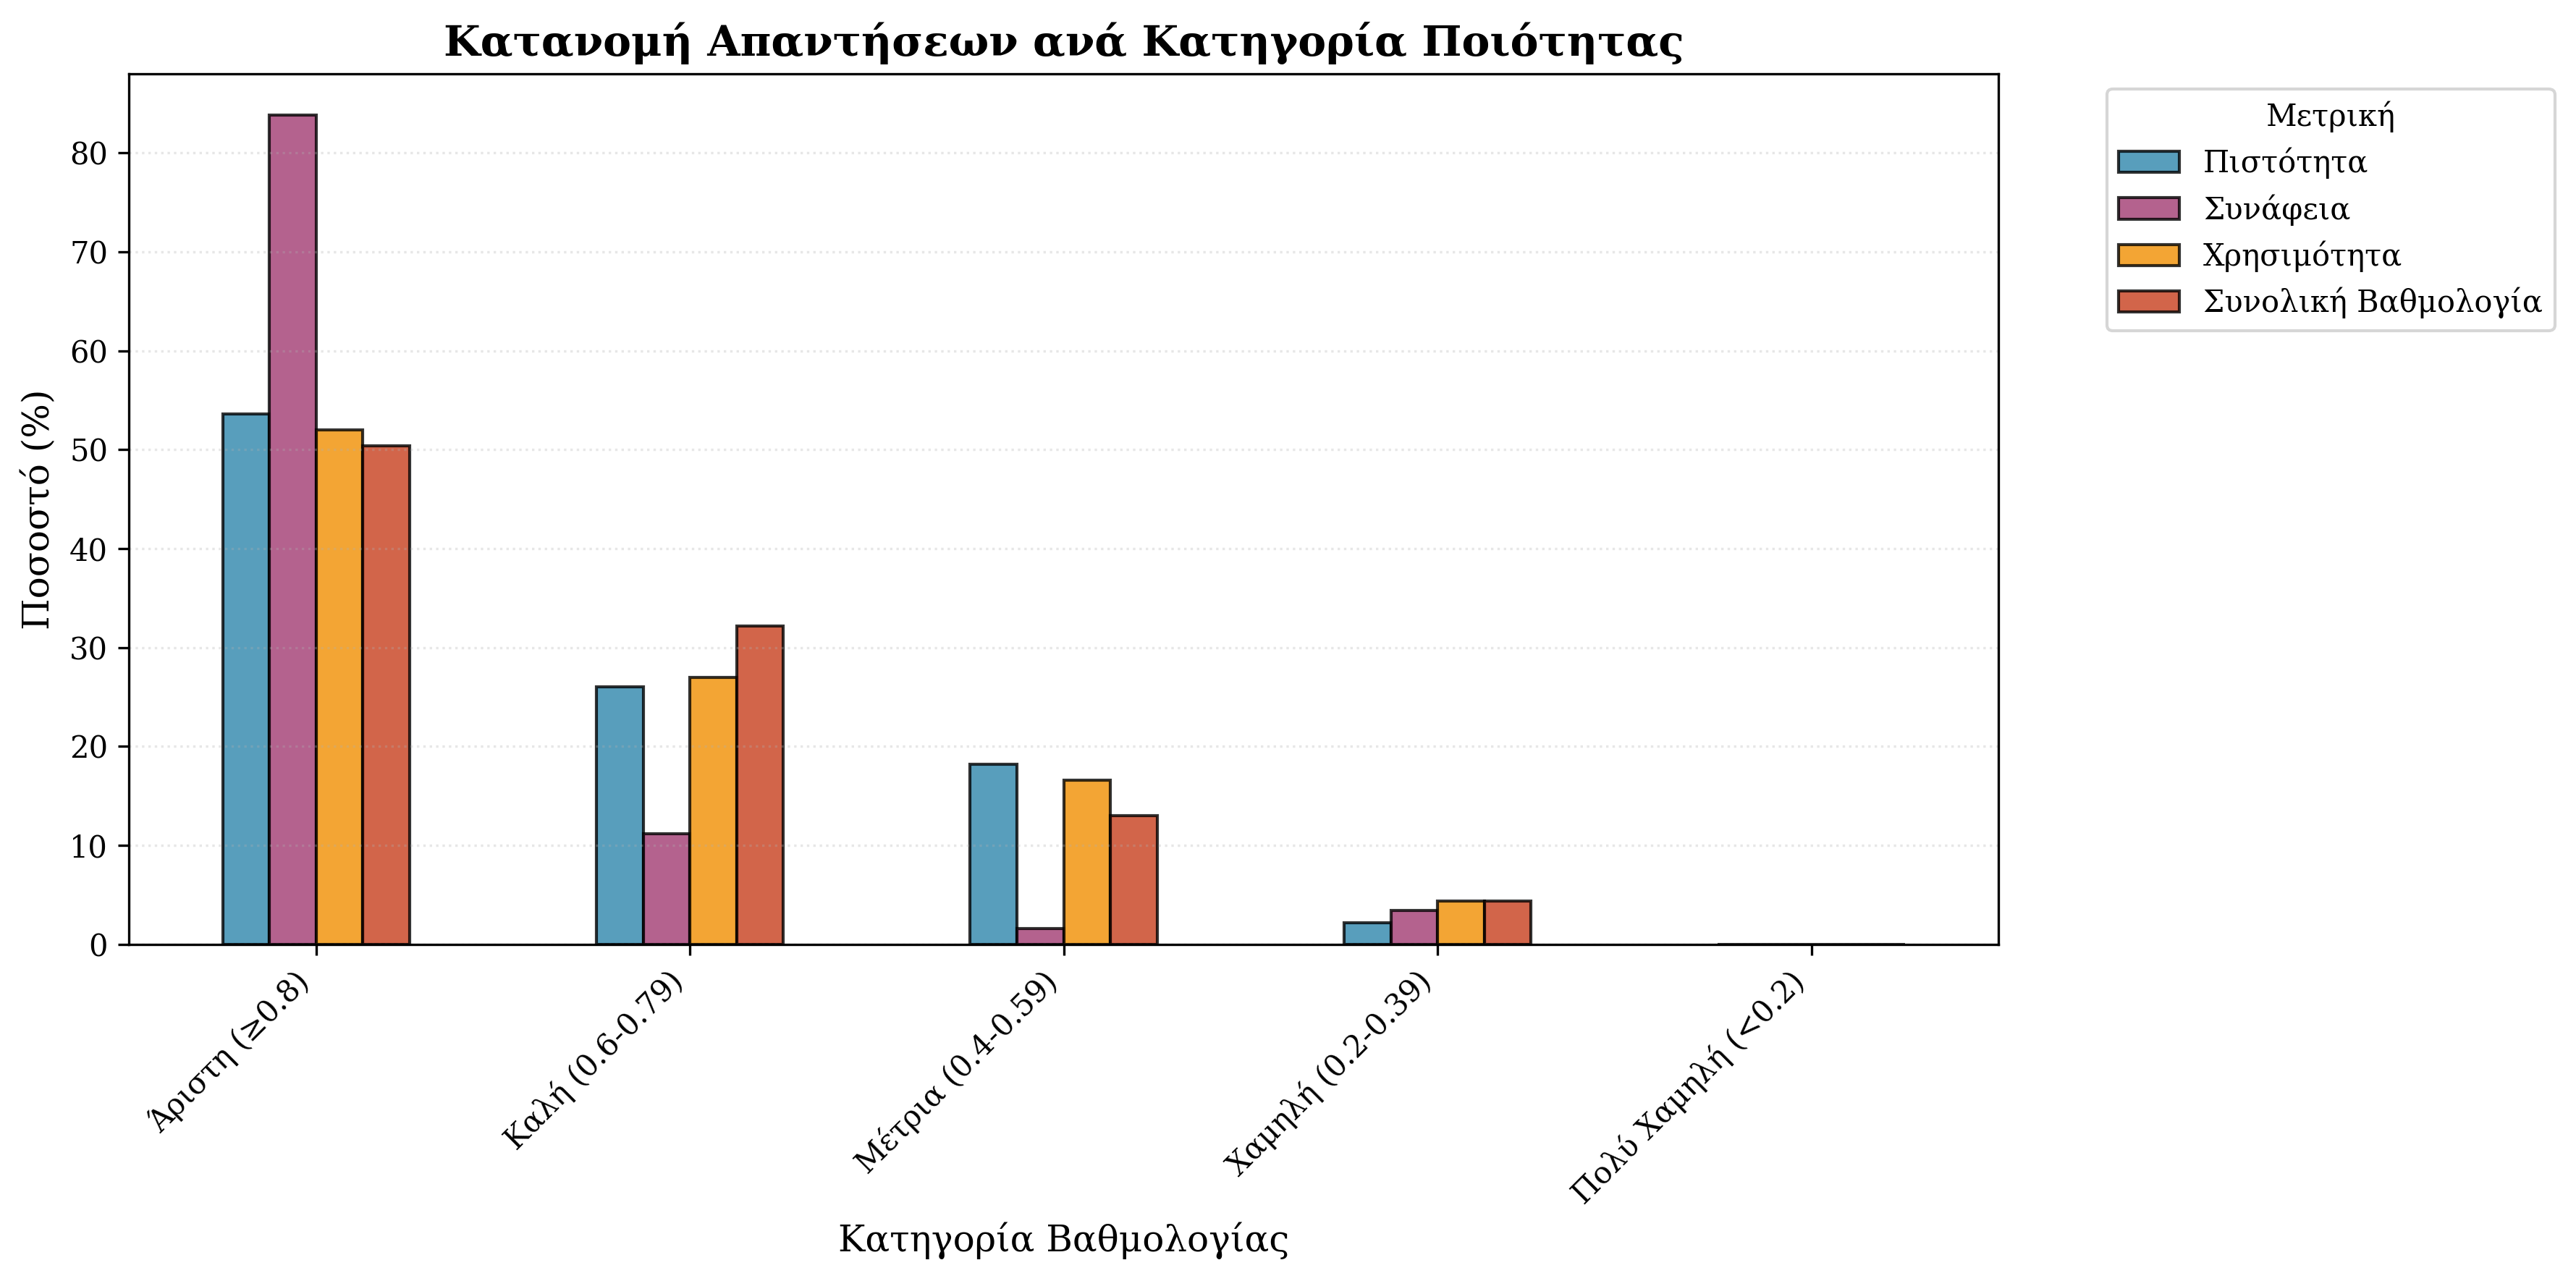

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/category_distribution.png


In [40]:
# Οπτικοποίηση κατανομής κατηγοριών
fig, ax = plt.subplots(figsize=(12, 6))

category_df_pct = (category_df / len(df) * 100)
category_df_pct.plot(kind='bar', ax=ax, color=COLORS, alpha=0.8, edgecolor='black')

ax.set_ylabel('Ποσοστό (%)', fontsize=12)
ax.set_xlabel('Κατηγορία Βαθμολογίας', fontsize=12)
ax.set_title('Κατανομή Απαντήσεων ανά Κατηγορία Ποιότητας', fontsize=14, fontweight='bold')
ax.legend(title='Μετρική', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle=':')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'category_distribution.png'}")

In [41]:
# Φόρτωση δεδομένων από Standard RAG και Self-RAG για σύγκριση
standard_rag_path = "/home/spiros/Desktop/Thesis/results/llm_judge_scores/llm_judge_scores_openai_gpt-5.jsonl"
self_rag_path = "/home/spiros/Desktop/Thesis/results/llm_judge_scores/llm_judge_scores_self_rag_openai_gpt-5.jsonl"

# Φόρτωση Standard RAG
data_standard = []
with open(standard_rag_path, 'r', encoding='utf-8') as f:
    for line in f:
        data_standard.append(json.loads(line))

df_standard_raw = pd.DataFrame(data_standard)
df_standard = df_standard_raw.copy()
for metric in metrics:
    df_standard[metric] = df_standard[metric] / 5.0
df_standard['overall'] = df_standard[metrics].mean(axis=1)

# Φόρτωση Self-RAG
data_self_rag = []
with open(self_rag_path, 'r', encoding='utf-8') as f:
    for line in f:
        data_self_rag.append(json.loads(line))

df_self_rag_raw = pd.DataFrame(data_self_rag)
df_self_rag = df_self_rag_raw.copy()
for metric in metrics:
    df_self_rag[metric] = df_self_rag[metric] / 5.0
df_self_rag['overall'] = df_self_rag[metrics].mean(axis=1)

print("✓ Φόρτωση δεδομένων Standard RAG και Self-RAG ολοκληρώθηκε")
print(f"\nStandard RAG: {len(df_standard)} εγγραφές")
print(f"Self-RAG: {len(df_self_rag)} εγγραφές")

✓ Φόρτωση δεδομένων Standard RAG και Self-RAG ολοκληρώθηκε

Standard RAG: 500 εγγραφές
Self-RAG: 500 εγγραφές


In [42]:
# Συγκριτικά στατιστικά
print("\n" + "="*80)
print("ΣΥΓΚΡΙΣΗ: Standard RAG vs Self-RAG")
print("="*80)

comparison_data = []
for metric in metrics_with_overall:
    standard_mean = df_standard[metric].mean()
    self_rag_mean = df_self_rag[metric].mean()
    difference = self_rag_mean - standard_mean
    pct_change = (difference / standard_mean) * 100
    
    comparison_data.append({
        'Μετρική': metric_names_gr[metric],
        'Standard RAG': f"{standard_mean:.3f}",
        'Self-RAG': f"{self_rag_mean:.3f}",
        'Διαφορά': f"{difference:.3f}",
        'Ποσοστιαία Αλλαγή': f"{pct_change:+.1f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Αποθήκευση
comparison_df.to_csv(OUTPUT_DIR / 'comparison_standard_vs_self_rag.csv', encoding='utf-8-sig', index=False)
print(f"\n✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'comparison_standard_vs_self_rag.csv'}")

# Στατιστική σημαντικότητα (t-test)
print("\n" + "="*80)
print("ΣΤΑΤΙΣΤΙΚΉ ΣΗΜΑΝΤΙΚΟΤΗΤΑ (Paired t-test)")
print("="*80)

for metric in metrics_with_overall:
    t_stat, p_value = stats.ttest_rel(df_standard[metric], df_self_rag[metric])
    significance = "✓ Στατιστικά σημαντικό" if p_value < 0.05 else "✗ Όχι σημαντικό"
    print(f"{metric_names_gr[metric]:25s} | t={t_stat:7.3f}, p={p_value:.4f} | {significance}")


ΣΥΓΚΡΙΣΗ: Standard RAG vs Self-RAG
            Μετρική Standard RAG Self-RAG Διαφορά Ποσοστιαία Αλλαγή
          Πιστότητα        0.677    0.694   0.017             +2.5%
           Συνάφεια        0.873    0.857  -0.016             -1.8%
        Χρησιμότητα        0.716    0.670  -0.046             -6.4%
Συνολική Βαθμολογία        0.755    0.740  -0.015             -2.0%

✓ Αποθηκεύτηκε: ../../results/llm_judge_analysis_self_rag/comparison_standard_vs_self_rag.csv

ΣΤΑΤΙΣΤΙΚΉ ΣΗΜΑΝΤΙΚΟΤΗΤΑ (Paired t-test)
Πιστότητα                 | t= -1.547, p=0.1226 | ✗ Όχι σημαντικό
Συνάφεια                  | t=  1.490, p=0.1369 | ✗ Όχι σημαντικό
Χρησιμότητα               | t=  4.016, p=0.0001 | ✓ Στατιστικά σημαντικό
Συνολική Βαθμολογία       | t=  1.508, p=0.1322 | ✗ Όχι σημαντικό


## Ανάλυση: Γιατί το Self-RAG είχε χειρότερα αποτελέσματα;

### Κύρια Ευρήματα:

1. **Πιστότητα (Μικρή βελτίωση +2.5%)**: Το Self-RAG πέτυχε μικρή βελτίωση, αλλά όχι στατιστικά σημαντική

2. **Συνάφεια (Μικρή χείρωση -1.8%)**: Η συνάφεια μείωσε μικρά

3. **Χρησιμότητα (Σημαντική χείρωση -6.4%)**: Αυτή είναι η μεγαλύτερη και **στατιστικά σημαντική** (p=0.0001) χείρωση

4. **Συνολική Βαθμολογία (-2.0%)**: Γενική χείρωση

In [ ]:
# Εύρεση περιπτώσεων όπου Self-RAG είχε σημαντικά χειρότερα αποτελέσματα
df_comparison = pd.DataFrame({
    'question': df_standard['question'],
    'standard_helpfulness': df_standard['helpfulness'],
    'self_rag_helpfulness': df_self_rag['helpfulness'],
    'standard_answer': df_standard_raw['answer'],
    'self_rag_answer': df_self_rag_raw['answer'],
    'standard_justification': df_standard_raw['justification'],
    'self_rag_justification': df_self_rag_raw['justification']
})

df_comparison['helpfulness_diff'] = df_comparison['self_rag_helpfulness'] - df_comparison['standard_helpfulness']

# Βρες τις 10 χειρότερες περιπτώσεις
worst_cases = df_comparison.nsmallest(10, 'helpfulness_diff')

print("\n" + "="*80)
print("ΠΕΡΙΠΤΩΣΕΙΣ ΠΟΥ ΤΟ SELF-RAG ΕΙΧΕ ΣΗΜΑΝΤΙΚΑ ΧΕΙΡΟΤΕΡΑ ΑΠΟΤΕΛΕΣΜΑΤΑ")
print("="*80)

for idx, row in worst_cases.head(3).iterrows():
    print(f"\n{'='*80}")
    print(f"Ερώτηση: {row['question'][:150]}...")
    print(f"\nΑλλαγή χρησιμότητας: {row['helpfulness_diff']:.2f} ({row['standard_helpfulness']:.2f} → {row['self_rag_helpfulness']:.2f})")
    print(f"\nStandard RAG Αιτιολόγηση:\n{row['standard_justification'][:300]}...")
    print(f"\nSelf-RAG Αιτιολόγηση:\n{row['self_rag_justification'][:300]}...")
    print(f"\n{'='*80}")

In [ ]:
# Οπτικοποίηση σύγκρισης
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, metric in enumerate(metrics_with_overall):
    ax = axes[idx // 2, idx % 2]
    
    # Create violin plots
    data_to_plot = [
        df_standard[metric],
        df_self_rag[metric]
    ]
    
    parts = ax.violinplot(data_to_plot, positions=[1, 2], showmeans=True, showmedians=True)
    
    # Color the violins
    for pc, color in zip(parts['bodies'], [COLORS[0], COLORS[1]]):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Standard RAG', 'Self-RAG'])
    ax.set_ylabel('Βαθμολογία (0-1)', fontsize=11)
    ax.set_title(f'{metric_names_gr[metric]}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle=':')
    ax.set_ylim(0, 1)
    
    # Add mean values as text
    mean_std = df_standard[metric].mean()
    mean_self = df_self_rag[metric].mean()
    ax.text(1, 0.05, f'Μ.Ο.={mean_std:.3f}', ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.text(2, 0.05, f'Μ.Ο.={mean_self:.3f}', ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Σύγκριση Standard RAG vs Self-RAG', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'comparison_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'comparison_violin_plots.png'}")

In [ ]:
# Bar chart για αμεση σύγκριση
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics_with_overall))
width = 0.35

means_standard = [df_standard[m].mean() for m in metrics_with_overall]
means_self_rag = [df_self_rag[m].mean() for m in metrics_with_overall]

bars1 = ax.bar(x - width/2, means_standard, width, label='Standard RAG', color=COLORS[0], alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, means_self_rag, width, label='Self-RAG', color=COLORS[1], alpha=0.8, edgecolor='black')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Μέση Βαθμολογία (0-1)', fontsize=12)
ax.set_title('Σύγκριση Απόδοσης: Standard RAG vs Self-RAG', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([metric_names_gr[m] for m in metrics_with_overall], rotation=15, ha='right')
ax.legend(loc='upper right', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle=':')
ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'comparison_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Αποθηκεύτηκε: {OUTPUT_DIR / 'comparison_bar_chart.png'}")

## Ριζική Ανάλυση: Γιατί το Self-RAG απέτυχε;

### Πιθανές Αιτίες:

#### 1. **Υπερ-συντηρητικός Verifier**
- Ο verifier είναι πολύ αυστηρός και εντοπίζει "hallucinations" σε φυσιολογικές παραφράσεις
- Οδηγίες για false positives, αλλά ίσως όχι αρκετά

#### 2. **Αρνητική Ανατροφοδότηση (Negative Feedback Loop)**
- Ο verifier λέει ότι υπάρχουν hallucinations
- Το LLM προσπαθεί να διορθώσει και γίνεται υπερβολικά συντηρητικό
- Αφαιρεί χρήσιμες πληροφορίες και παραδείγματα κώδικα

#### 3. **Κακά Προμπτς για Revision**
- Το revision prompt λέει "Remove any information not supported by context"
- Αυτό προκαλεί υπερβολική αφαίρεση πληροφοριών

#### 4. **Απώλεια Φυσικότητας**
- Η διαδικασία αναθεώρησης κάνει τις απαντήσεις πιο τεχνητές και λιγότερο χρήσιμες
- Απώλεια conversational tone

#### 5. **Μη Ρεαλιστικός Στόχος**
- Το Self-RAG προσπαθεί να ελέγξει 100% faithfulness
- Στην πράξη, οι χρήστες προτιμούν helpfulness > strict faithfulness
- Παραδείγματα κώδικα και πρακτικές συμβουλές είναι πιο σημαντικά

### Προτεινόμενες Λύσεις:

1. **Μετριοπάθεια στον Verifier**: Μόνο για major fabrications
2. **Confidence Threshold**: Μη αναθεώρηση αν confidence > 0.7
3. **Selective Revision**: Revise μόνο τα προβληματικά τμήματα, όχι ολόκληρη την απάντηση
4. **Multi-Objective Optimization**: Balance faithfulness AND helpfulness
5. **Human-in-the-loop Calibration**: Ρύθμιση του verifier με ανθρώπινα feedback